# Hands on neural network

## Neural network with Tensorflow : Face recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=200, resize=0.25)

# 766 images of 31 * 23 pixel black & white
print(faces.images.shape)

(766, 31, 23)


In [2]:
# 2 different target classes
np.unique(faces.target)

array([0, 1])

Let's visualize some faces:

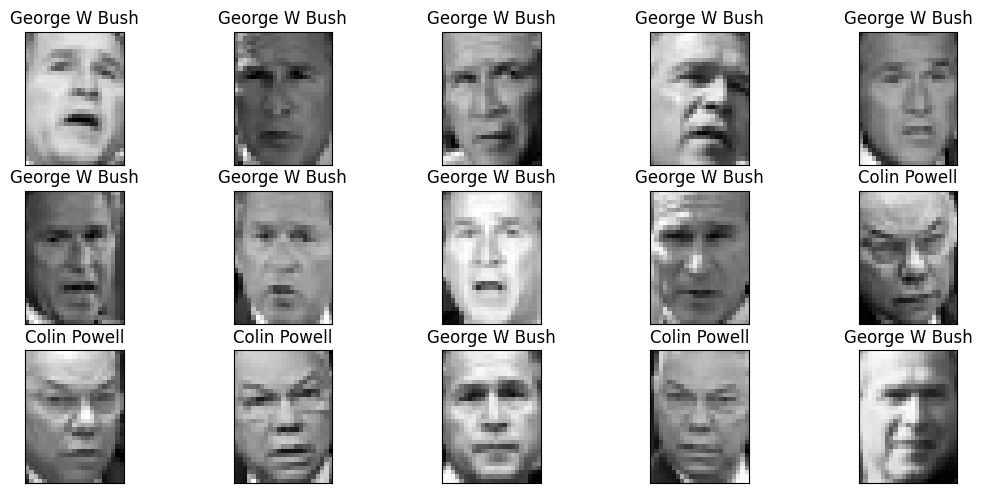

In [3]:
fig = plt.figure(figsize=(13,10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.title(faces.target_names[faces.target[i]], size=12)
    plt.imshow(faces.images[i], cmap=plt.cm.gray)
    plt.xticks(()); plt.yticks(())

### Minimal preprocessing

In [4]:
# Flatten our 766 images
X = faces.images.reshape(766, 31*23)
X.shape

(766, 713)

In [5]:
y = faces.target
y.shape

(766,)

In [6]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [7]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

### Simple model with two hidden layers

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Model definition
model = Sequential()
model.add(layers.Dense(20, activation='relu', input_dim=713))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

2023-02-02 03:03:45.756688: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-02 03:03:46.150444: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-02 03:03:46.150468: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2023-02-02 03:03:47.384651: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-02 03:03:47.384850: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-02 03:03:47.384862: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 20)                14280     


 dense_1 (Dense)             (None, 10)                210       


 dense_2 (Dense)             (None, 1)                 11        


Total params: 14,501


Trainable params: 14,501


Non-trainable params: 0


_________________________________________________________________


2023-02-02 03:03:48.702813: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-02 03:03:48.703189: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-02 03:03:48.703217: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fv-az173-220): /proc/driver/nvidia/version does not exist
2023-02-02 03:03:48.704182: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20


 1/36 [..............................] - ETA: 25s - loss: 0.8215 - accuracy: 0.4375

36/36 [==============================] - 1s 1ms/step - loss: 0.5156 - accuracy: 0.7683


Epoch 2/20


 1/36 [..............................] - ETA: 0s - loss: 0.1788 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.2521 - accuracy: 0.9129


Epoch 3/20


 1/36 [..............................] - ETA: 0s - loss: 0.1411 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.1627 - accuracy: 0.9582


Epoch 4/20


 1/36 [..............................] - ETA: 0s - loss: 0.0747 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.1217 - accuracy: 0.9599


Epoch 5/20


 1/36 [..............................] - ETA: 0s - loss: 0.0613 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0978 - accuracy: 0.9721


Epoch 6/20


 1/36 [..............................] - ETA: 0s - loss: 0.0551 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0833 - accuracy: 0.9721


Epoch 7/20


 1/36 [..............................] - ETA: 0s - loss: 0.0202 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0457 - accuracy: 0.9861


Epoch 8/20


 1/36 [..............................] - ETA: 0s - loss: 0.0670 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0355 - accuracy: 0.9895


Epoch 9/20


 1/36 [..............................] - ETA: 0s - loss: 0.0110 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0238 - accuracy: 0.9948


Epoch 10/20


 1/36 [..............................] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9983


Epoch 11/20


 1/36 [..............................] - ETA: 0s - loss: 0.0095 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 0.9983


Epoch 12/20


 1/36 [..............................] - ETA: 0s - loss: 0.0063 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0119 - accuracy: 0.9983


Epoch 13/20


 1/36 [..............................] - ETA: 0s - loss: 0.0120 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 0.9983


Epoch 14/20


 1/36 [..............................] - ETA: 0s - loss: 0.0066 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 0.9983


Epoch 15/20


 1/36 [..............................] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 0.9983


Epoch 16/20


 1/36 [..............................] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 0.9983


Epoch 17/20


 1/36 [..............................] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 0.9983


Epoch 18/20


 1/36 [..............................] - ETA: 0s - loss: 0.0045 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000


Epoch 19/20


 1/36 [..............................] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000


Epoch 20/20


 1/36 [..............................] - ETA: 0s - loss: 8.4152e-04 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 1.0000


### Evaluate performance

In [10]:
model.evaluate(scaler.transform(X_test), y_test)
# returns [loss, metrics]

1/6 [====>.........................] - ETA: 0s - loss: 0.1779 - accuracy: 0.9688

6/6 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.9375


[0.33320140838623047, 0.9375]

Is it good? What's our baseline?

In [11]:
pd.Series(y).value_counts()


1    530
0    236
dtype: int64

In [12]:
# Baseline score
530 / (530+236)

0.6919060052219321

### Let's check our predictions!

In [13]:
# Predicted probabilities
model.predict(scaler.transform(X_test))

1/6 [====>.........................] - ETA: 0s

6/6 [==============================] - 0s 1ms/step


array([[9.99961615e-01],
       [1.92221731e-01],
       [9.98501301e-01],
       [1.07206972e-04],
       [6.19047098e-02],
       [9.98785377e-01],
       [1.59842451e-03],
       [9.99253571e-01],
       [2.15027612e-05],
       [9.99982715e-01],
       [9.97970462e-01],
       [9.99999702e-01],
       [7.48828995e-07],
       [1.00000000e+00],
       [3.01291402e-02],
       [9.99986589e-01],
       [9.99999762e-01],
       [9.99995589e-01],
       [1.00000000e+00],
       [9.99761522e-01],
       [9.98990774e-01],
       [9.99996364e-01],
       [9.99999821e-01],
       [5.06662667e-01],
       [9.99999583e-01],
       [9.99951482e-01],
       [9.99931574e-01],
       [1.26791615e-02],
       [9.90657806e-01],
       [9.95909870e-01],
       [7.57424277e-04],
       [9.94395435e-01],
       [9.99997437e-01],
       [6.82517348e-05],
       [9.99749899e-01],
       [5.96171558e-05],
       [9.99976754e-01],
       [9.98910189e-01],
       [7.85249114e-01],
       [8.96932006e-01],


## Linear regression with Tensorflow

## Logistic regression with Tensorflow